# Stock Prediction by Keras

- tf.keras 를 이용
- pandas package 사용
- RNN, LSTM cell 사용
- S&P 500 DATA 사용

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import urllib

/Users/chjeong/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Download S&P 500 Stock data and read

In [2]:
# urllib.request.urlretrieve('https://github.com/CNuge/kaggle-code/raw/master/stock_data/all_stocks_5yr.csv'+'/?accessType=download', './data/all_stocks_5yr.csv')

In [3]:
data = pd.read_csv('./data/all_stocks_5yr.csv')

### Set data

In [4]:
cl = data[data['Name']=='MMM']
cl = cl[['close', 'low', 'high']].values

In [5]:
def set_data(cl):
    scl = MinMaxScaler()
    cl = scl.fit_transform(cl)
    return cl, scl

In [6]:
cl, scl = set_data(cl)

In [7]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [8]:
X, y = processData(cl,7)

In [9]:
print(X.shape)
print(y.shape)

(1251, 7, 3)
(1251,)


In [10]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


### Build the model

In [11]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256,input_shape=(7,3)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],3))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],3))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 6.7825e-04 - val_loss: 0.0038
Epoch 2/10
1000/1000 [==============================] - 1s 609us/step - loss: 0.0019 - val_loss: 0.0061
Epoch 3/10
1000/1000 [==============================] - 1s 629us/step - loss: 3.7404e-04 - val_loss: 0.0037
Epoch 4/10
1000/1000 [==============================] - 0s 468us/step - loss: 6.8575e-04 - val_loss: 0.0053
Epoch 5/10
1000/1000 [==============================] - 0s 496us/step - loss: 0.0015 - val_loss: 0.0026
Epoch 6/10
1000/1000 [==============================] - 0s 474us/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/10
1000/1000 [==============================] - 0s 469us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/10
1000/1000 [==============================] - 0s 474us/step - loss: 3.7884e-04 - val_loss: 0.0015
Epoch 9/10
1000/1000 [==============================] - 0s 472us/step - loss: 3.3570e-04 - val_loss: 0.0021

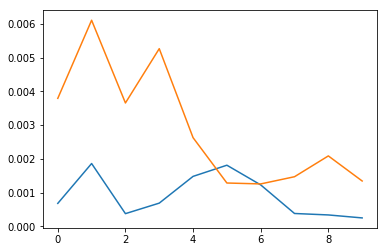

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [13]:
X_test[0]

array([[0.46959459, 0.47412787, 0.47781809],
       [0.46577002, 0.46725457, 0.46336961],
       [0.46800102, 0.47043185, 0.4655337 ],
       [0.46169046, 0.46556867, 0.45900961],
       [0.46717236, 0.46751394, 0.46235122],
       [0.46755482, 0.46783815, 0.46807969],
       [0.47176186, 0.47596875, 0.46935268]])

In [14]:
y_test.reshape(-1,1).shape

(251, 1)

In [15]:
Xt = model.predict(X_test)

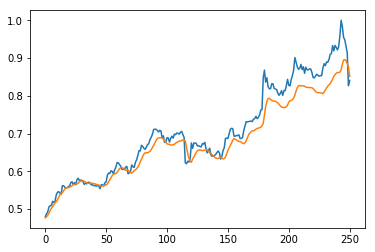

In [16]:
plt.plot(y_test.reshape(-1,1))
plt.plot(Xt)

In [17]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,3))
print('predicted:{0}, actual:{1}'.format(Xt,y_test[i].reshape(-1,1)))
pred.append(Xt)
act.append(y_test[i].reshape(-1,1))

predicted:[[0.87662154]], actual:[[0.82668281]]


In [18]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

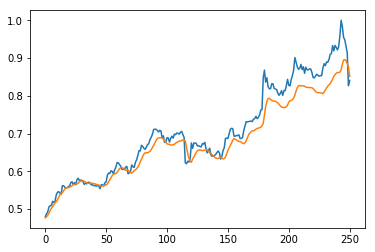

In [19]:
Xt = model.predict(X_test)
plt.plot(y_test.reshape(-1,1))
plt.plot(Xt)

In [20]:
X_test[249]

array([[0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712],
       [0.91420194, 0.92808974, 0.92985806]])

In [21]:
X_test[248]

array([[0.93026517, 0.93697316, 0.92852142],
       [0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712]])